# RMSF

In [3]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
#XRD Ensemble
#28 4NPQ
#18 4HFI

In [4]:
def rmsf_resid_dataframe(traj_name, ref_name, location = '/media/scottzhuang/data/MD/'):
    
    traj_location = location +  traj_name
    top_location = location + ref_name
    ref_location = location + ref_name
    
    traj = md.load(traj_location,top=top_location)
    print(traj)
    traj = traj[:100]
    ref = md.load(ref_location)
    topology = traj.topology
    if traj.n_atoms != ref.n_atoms:
        traj = traj.atom_slice(topology.select(residue_selection))
    traj.superpose(ref)
    topology = traj.topology
    seq = topology.to_fasta()[0]
    avg_xyz = np.mean(traj.xyz[:, :, :], axis=0)
    rmsf = np.sqrt(3*np.mean((traj.xyz[:, :, :] - avg_xyz)**2, axis=(0,2)))
    rmsd_data = pd.DataFrame({'RMSF':rmsf,'residue':list(range(0,traj.n_atoms)),'seq':list(seq)})
    rmsf_onechain = pd.DataFrame({'RMSF':np.zeros(311),'residue':list(range(0,311)),'seq':list(seq[:311])})
    #print(rmsf_onechain[215:235])
    return rmsf_onechain, rmsd_data

In [7]:
def ploting(traj_note,location = '/media/scottzhuang/data/MD/',skip=10,axes2=None):
    """
          INPUT: traj_note: "4NPQ_PH70_md1_yzhuang/4NPQ_pH70_BA1_md1"
                 location: "/media/scottzhuang/data/MD/" (default)
                 skip: 1 (default)
             -> ref_name = traj_note + ".ca.gro"
                traj_name = traj_note + ".skip" + skip + ".ca.xtc"
          OUTPUT: RMSD, RMSD Histogram, RMSF plotting
        
    """
    ref_name = traj_note + ".ca.gro"
    traj_name = traj_note + ".skip" + str(skip) + ".ca.xtc"
    rmsf_onechain, rmsf = rmsf_resid_dataframe(traj_name, ref_name,location)
    for i in range(0,311):
        rmsf_onechain['RMSF'][i] = np.mean([rmsf['RMSF'][i],rmsf['RMSF'][i+311],rmsf['RMSF'][i+622],rmsf['RMSF'][i+933],rmsf['RMSF'][i+1244]])
    #f, ax = plt.subplots()
    axes2.plot(rmsf_onechain['RMSF'][:].values.tolist())
    #axes2.plot(rmsf_onechain['RMSF'][215:235].values.tolist())
    #plt.xticks(np.arange(0,20), rmsf_onechain['seq'][215:235].values.tolist())

<mdtraj.Trajectory with 110 frames, 1555 atoms, 1555 residues, and unitcells>
<mdtraj.Trajectory with 110 frames, 1555 atoms, 1555 residues, and unitcells>
<mdtraj.Trajectory with 107 frames, 1555 atoms, 1555 residues, and unitcells>


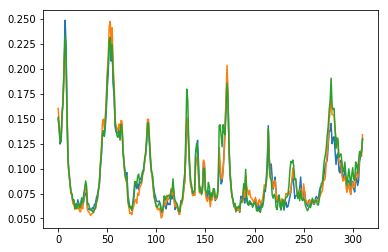

In [8]:
f, ax = plt.subplots()
ploting("md","/media/scottzhuang/data/MD/4HFI_pH46/",skip=10,axes2=ax)
ploting("md","/media/scottzhuang/data/MD/4HFI_pH46/repli1/",skip=10,axes2=ax)
ploting("md","/media/scottzhuang/data/MD/4HFI_pH46/repli2/",skip=10,axes2=ax)

<mdtraj.Trajectory with 104 frames, 1555 atoms, 1555 residues, and unitcells>
<mdtraj.Trajectory with 101 frames, 1555 atoms, 1555 residues, and unitcells>
<mdtraj.Trajectory with 104 frames, 1555 atoms, 1555 residues, and unitcells>


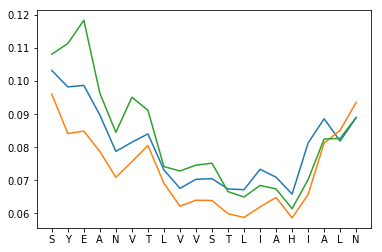

In [125]:
f, ax = plt.subplots()
ploting("md","/media/scottzhuang/data/MD/4HFI_F238L_pH46/",skip=10,axes2=ax)
ploting("md","/media/scottzhuang/data/MD/4HFI_F238L_pH46/repli1/",skip=10,axes2=ax)
ploting("md","/media/scottzhuang/data/MD/4HFI_F238L_pH46/repli2/",skip=10,axes2=ax)

<mdtraj.Trajectory with 103 frames, 1555 atoms, 1555 residues, and unitcells>
<mdtraj.Trajectory with 103 frames, 1555 atoms, 1555 residues, and unitcells>
<mdtraj.Trajectory with 103 frames, 1555 atoms, 1555 residues, and unitcells>


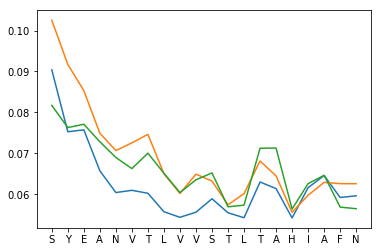

In [126]:
f, ax = plt.subplots()
ploting("md","/media/scottzhuang/data/MD/4HFI_I233T_pH46/",skip=10,axes2=ax)
ploting("md","/media/scottzhuang/data/MD/4HFI_I233T_pH46/repli1/",skip=10,axes2=ax)
ploting("md","/media/scottzhuang/data/MD/4HFI_I233T_pH46/repli2/",skip=10,axes2=ax)

<mdtraj.Trajectory with 106 frames, 1555 atoms, 1555 residues, and unitcells>
<mdtraj.Trajectory with 101 frames, 1555 atoms, 1555 residues, and unitcells>
<mdtraj.Trajectory with 112 frames, 1555 atoms, 1555 residues, and unitcells>


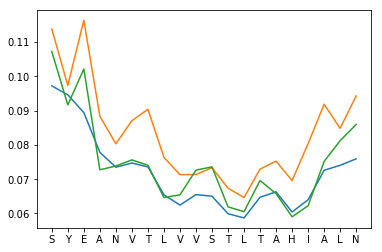

In [127]:
f, ax = plt.subplots()
ploting("md","/media/scottzhuang/data/MD/4HFI_F238LI233T_pH46/",skip=10,axes2=ax)
ploting("md","/media/scottzhuang/data/MD/4HFI_F238LI233T_pH46/repli1/",skip=10,axes2=ax)
ploting("md","/media/scottzhuang/data/MD/4HFI_F238LI233T_pH46/repli2/",skip=10,axes2=ax)